### Project : Credit Card Fraud Detection
### Email : nieldeshmukh02@gmail.com

## Fraud Detection

Fraud Detection is a technique used to identify unusual patterns that are different from the rest of the population and not behaving as expected. These unusual patterns are also called as outliers. 

The fraud detection involves in-depth data analysis/data-mining to recognize the unusual patterns.
In this dataset, most of the data analysis part is already done and most of the features are scaled. The names of the features are not shown due to privacy reasons.

Hence our main focus will be to balance the data and perform predective analysis.

## Problem Statement

The Credit Card Fraud Detection dataset contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## Goals

Goal here is to identify as much fraudulent credit card transactions as possible. And as mentioned in the dataset inspiration, calculation of accuracy using the Area Under the ROC(AUROC) as confusion matrix accuracy is not meaningful for unbalanced classification.

## 1.1 Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')


## 1.2 Reading Dataset

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 1.3 Understanding data

In [3]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
data.shape

(284807, 31)

#### There are 284807 rows and 31 columns.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344


### Missing Value check

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**There are no null values in the dataset.**

In [8]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**Thus there are 284807 rows and 31 columns.**

### 1.4 Fraud Cases & Genuine Cases

In [9]:
fraud_cases=len(data[data['Class']==1])

In [10]:
print(' Number of Fraud Cases:',fraud_cases)

 Number of Fraud Cases: 492


In [11]:
non_fraud_cases=len(data[data['Class']==0])

In [12]:
print('Number of Non Fraud Cases:',non_fraud_cases)

Number of Non Fraud Cases: 284315


In [13]:
fraud=data[data['Class']==1]

In [14]:
genuine=data[data['Class']==0]

In [15]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## 2.1 Exploratory Data Analysis

Text(0.5, 1.0, 'Fraud vs Non-fraud cases Count')

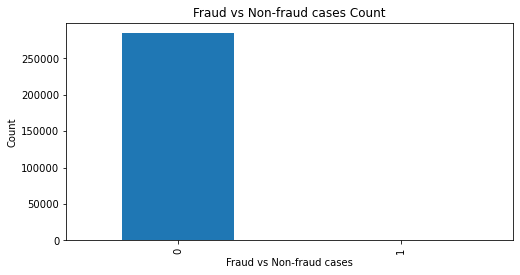

In [17]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(8,4))
ax = data.Class.value_counts().plot(kind = 'bar')
plt.xlabel("Fraud vs Non-fraud cases")
plt.ylabel("Count")
plt.title("Fraud vs Non-fraud cases Count")

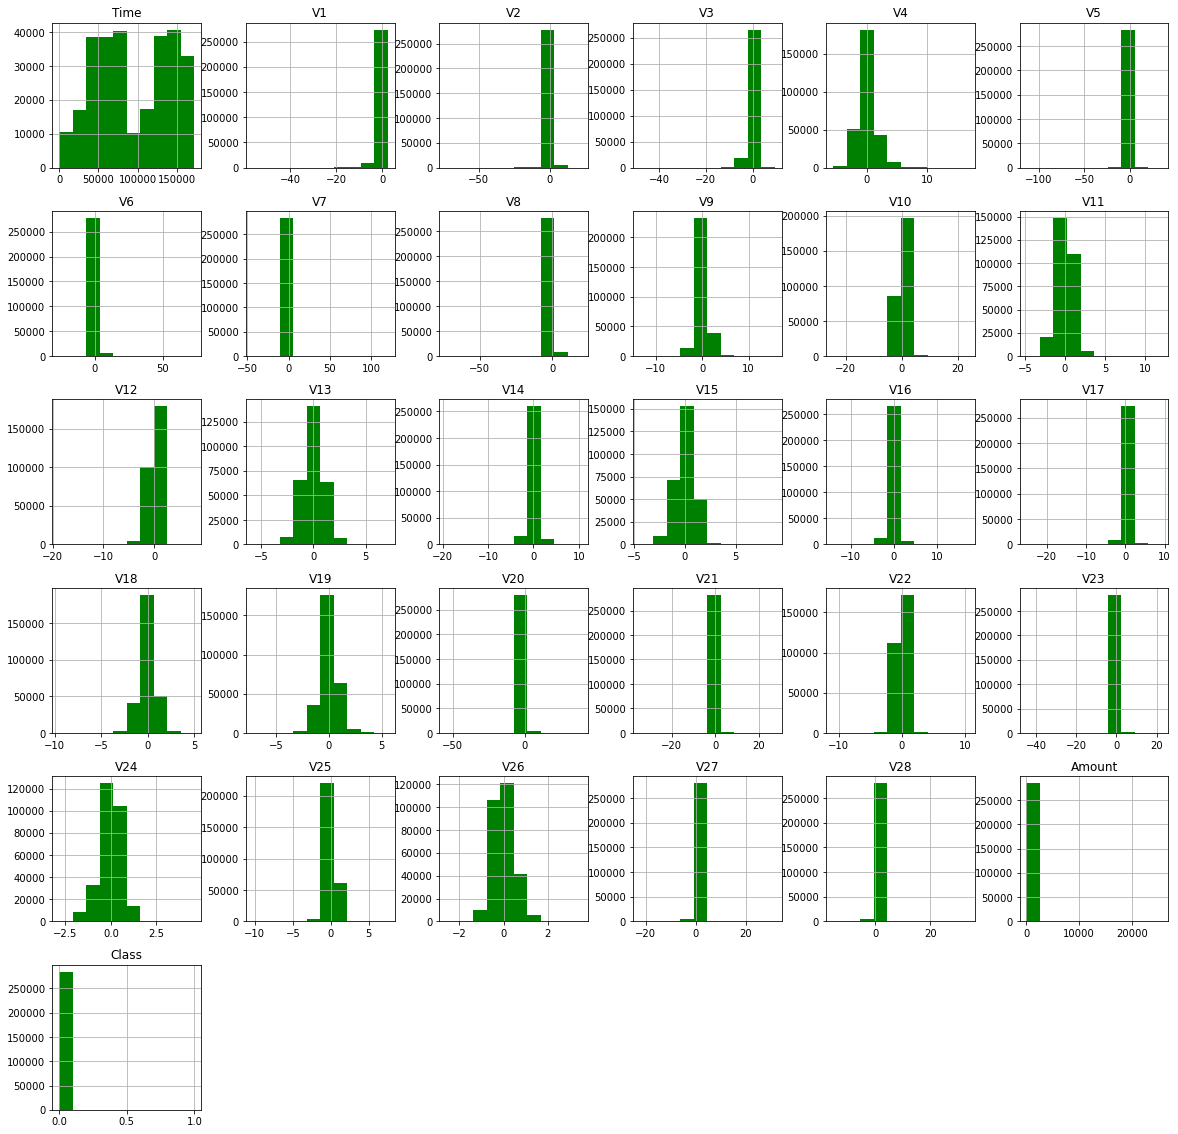

In [18]:
# Distribution of variables
data.hist(figsize=(20,20),color='green')
plt.show()

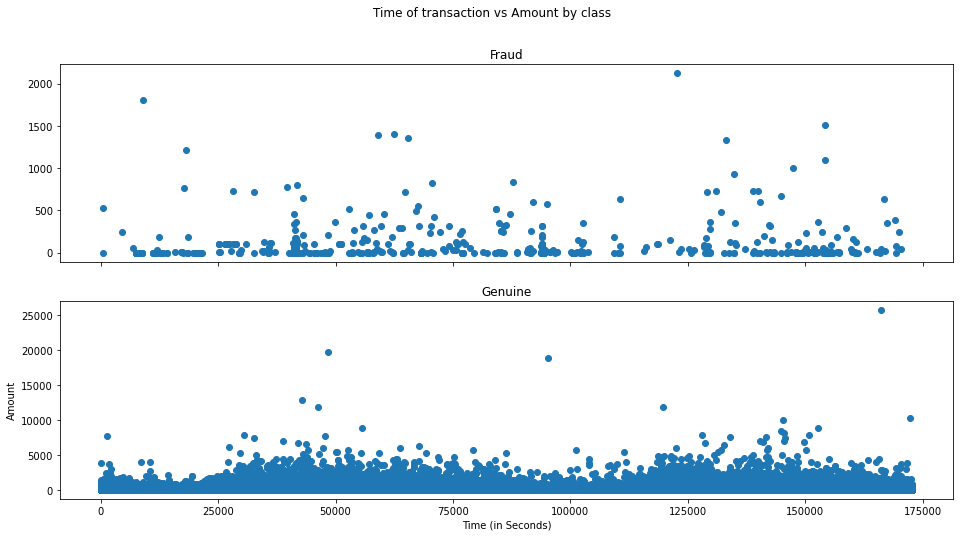

In [19]:
# Scatter plot showing Time of transaction vs Amount by class
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(genuine.Time, genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


### 2.2 Correlation

<AxesSubplot:>

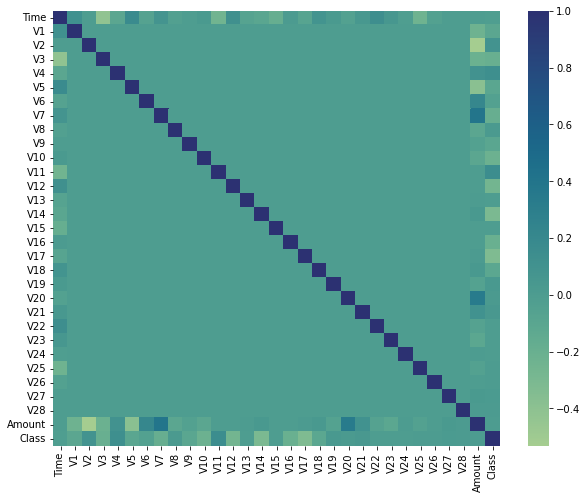

In [20]:
plt.figure(figsize=(10,8))
corr=data.corr()
sns.heatmap(corr,cmap='crest')

**Observations from Data-**
<a id = "data-observations"></a>

The data set is very imbalanced with only 492 Fraud records and 284315 Non-fraud records.
The dataset consists of numerical values from V1 to V28, which looks transformed from real data.
But 'Time' and 'Amount' features are not transformed. So we need scaling of dataset.
Using this data as it is with balancing it might overfit, but for comparison,we will first start with imbalanced data and see the results. Then we will balance the data and check the results again.

## 2.3 Scaling

In [21]:
## scaling the "Amount" and "Time" columns similar to the others variables

from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()
data['scaled_amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

# now drop the original columns
data.drop(['Time','Amount'], axis=1, inplace=True)

In [22]:
# define X and y variables
X = data.drop(["Class"], axis = 1)
y = data["Class"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## 3. Model Building & Evaluation on Original Data

### 3.1 Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))

Accuracy Score: 0.999204147794436
Recall Score: 0.6190476190476191
Precision Score: 0.883495145631068


In [25]:

def evaluation(y_actual, predicted):
    cnf_matrix = confusion_matrix(y_actual, predicted)

    plt.figure(figsize=(10,5))
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    labels = ['Non-Fraud', 'Fraud']
    print(classification_report(y_actual, predicted, target_names = labels))

              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85296
       Fraud       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443



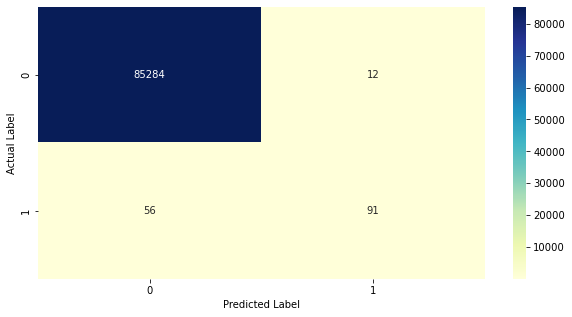

In [26]:

evaluation(y_test, y_pred)

AUC score is:  0.8094534662486266


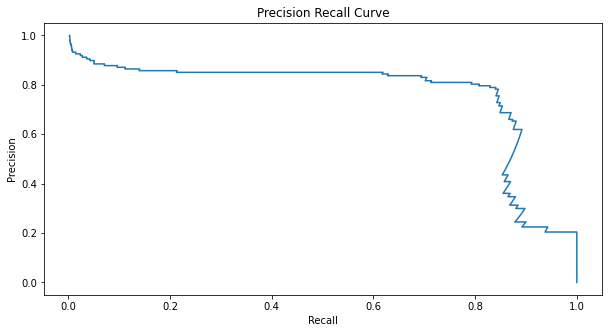

In [27]:
plt.figure(figsize=(10,5))
y_pred_prob = logreg.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
print("AUC score is: ", roc_auc_score(y_test, y_pred))


### 3.2 Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))

Accuracy Score: 0.9992509626300574
Recall Score: 0.7551020408163265
Precision Score: 0.7985611510791367


              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85296
       Fraud       0.77      0.73      0.75       147

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



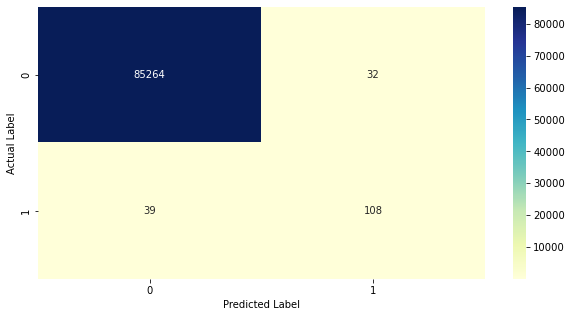

In [29]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred_dt = dtree.predict(X_test)
evaluation(y_test, y_pred_dt)

AUC score is:  0.8773868860994032


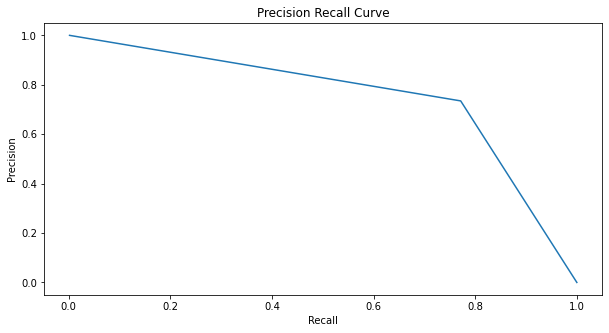

In [30]:
plt.figure(figsize=(10,5))
y_pred_prob = dtree.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
print("AUC score is: ", roc_auc_score(y_test, y_pred))

## 4. Balance data using undersampling method
#### This is an extremely unbalanced dataset so we need to take a subsample by undersampling

In [31]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199364, 30) (199364,)
(85443, 30) (85443,)


In [32]:
# number of fraud cases
frauds = len(data[data.Class == 1])

# selecting the indices of the non-fraud classes
fraud_indices = data[data.Class == 1].index
nonfraud_indices = data[data.Class == 0].index

# From all non-fraud observations, randomly select observations equal to number of fraud observations
random_nonfraud_indices = np.random.choice(nonfraud_indices, frauds, replace = False)
random_nonfraud_indices = np.array(random_nonfraud_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_nonfraud_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

# Now split X, y variables from the under sample data
X1 = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y1 = under_sample_data.loc[:, under_sample_data.columns == 'Class']
print(X1.shape, y1.shape) 

(984, 30) (984, 1)


In [33]:
# Split dataset
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

### 4.1 Logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
y_pred1 = logreg.predict(X_test1)

print("Accuracy Score:", accuracy_score(y_test1, y_pred1))
print("Recall Score:", recall_score(y_test1, y_pred1))
print("Precision Score:", precision_score(y_test1, y_pred1))

Accuracy Score: 0.9391891891891891
Recall Score: 0.9251700680272109
Precision Score: 0.951048951048951


              precision    recall  f1-score   support

   Non-Fraud       0.93      0.95      0.94       149
       Fraud       0.95      0.93      0.94       147

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



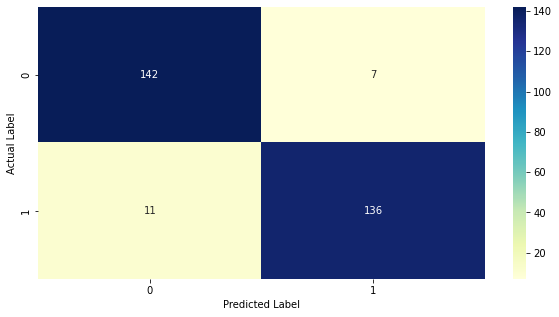

In [35]:
evaluation(y_test1, y_pred1)

AUC score is:  0.9390951011276994


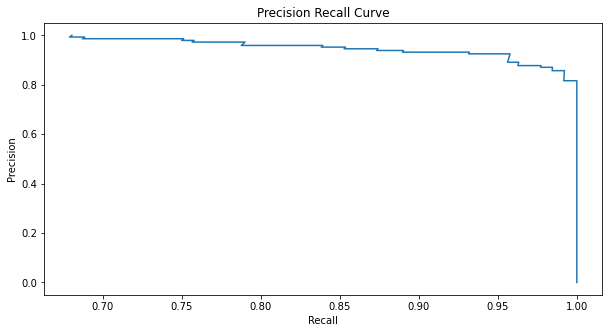

In [36]:
plt.figure(figsize=(10,5))
y_pred_prob1 = logreg.predict_proba(X_test1)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test1, y_pred_prob1)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
print("AUC score is: ", roc_auc_score(y_test1, y_pred1))

### 4.2 Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train1, y_train1)
y_pred2 = dtree.predict(X_test1)

print("Accuracy Score:", accuracy_score(y_test1, y_pred2))
print("Recall Score:", recall_score(y_test1, y_pred2))
print("Precision Score:", precision_score(y_test1, y_pred2))

Accuracy Score: 0.8918918918918919
Recall Score: 0.9455782312925171
Precision Score: 0.852760736196319


              precision    recall  f1-score   support

   Non-Fraud       0.94      0.87      0.91       149
       Fraud       0.88      0.95      0.91       147

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296



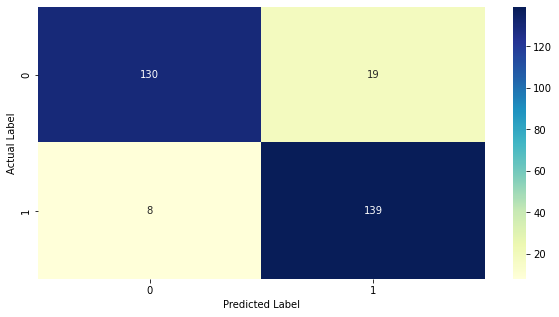

In [38]:
evaluation(y_test1, y_pred2)

AUC score is:  0.9090307263845134


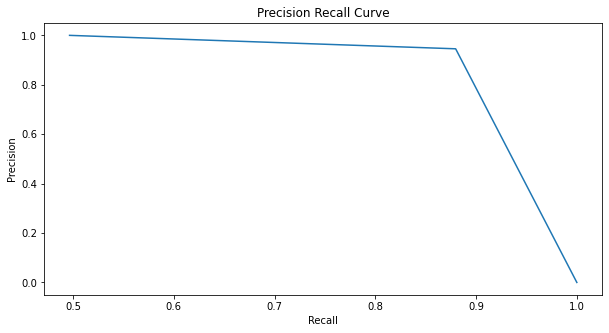

In [39]:
plt.figure(figsize=(10,5))
y_pred_prob1 = dtree.predict_proba(X_test1)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test1, y_pred_prob1)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
print("AUC score is: ", roc_auc_score(y_test1, y_pred2))

## 5. Feature Selection

In [40]:
X.var()

V1                3.836489
V2                2.726820
V3                2.299029
V4                2.004684
V5                1.905081
V6                1.774946
V7                1.530401
V8                1.426479
V9                1.206992
V10               1.185594
V11               1.041855
V12               0.998403
V13               0.990571
V14               0.918906
V15               0.837803
V16               0.767819
V17               0.721373
V18               0.702539
V19               0.662662
V20               0.594325
V21               0.539526
V22               0.526643
V23               0.389951
V24               0.366808
V25               0.271731
V26               0.232543
V27               0.162919
V28               0.108955
scaled_amount    12.215067
scaled_time       0.311256
dtype: float64

Usually we delete those columns having variance less than 0.1, but here all features have column greater than 0.1 
thus we will retain all the features

## Recursive Feature Elimination

<b>What is RFE?</b>

In this method, we start with all the features and keep removing one feature in every iteration that provides the least value 
to a given model. In each iteration, we can eliminate the least important features and keep eliminating it,
until we reach the number of features needed.

### 5.1 Decision tree With 15 features

In [41]:
from sklearn.feature_selection import RFE

In [42]:
model = DecisionTreeClassifier()
selector = RFE(model, n_features_to_select = 15)
selector.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=15)

In [43]:
selector.support_

array([ True, False, False,  True, False, False,  True, False, False,
        True, False,  True, False,  True,  True, False,  True,  True,
       False, False,  True, False, False,  True, False,  True,  True,
        True,  True, False])

In [44]:
a = selector.support_
true_index = [i + 1 if a[i] == True else False for i in range(0, len(a))]
selected_cols = []
cols = data.columns
for i in true_index:
    if i == False:
        pass
    else:
        selected_cols.append(cols[i - 1])
        
print("15 selected features are: ", selected_cols)


15 selected features are:  ['V1', 'V4', 'V7', 'V10', 'V12', 'V14', 'V15', 'V17', 'V18', 'V21', 'V24', 'V26', 'V27', 'V28', 'Class']


              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85296
       Fraud       0.82      0.75      0.78       147

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



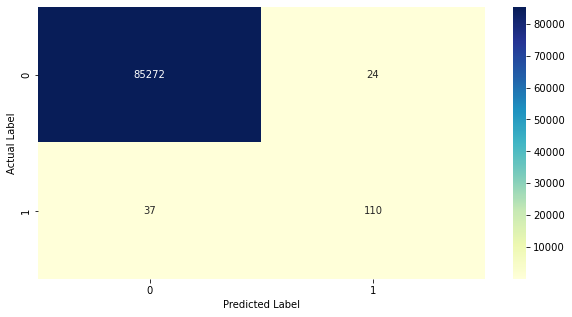

In [45]:
prediction_dtc = selector.predict(X_test)
evaluation(y_test, prediction_dtc)

AUC score is:  0.8740089733135797


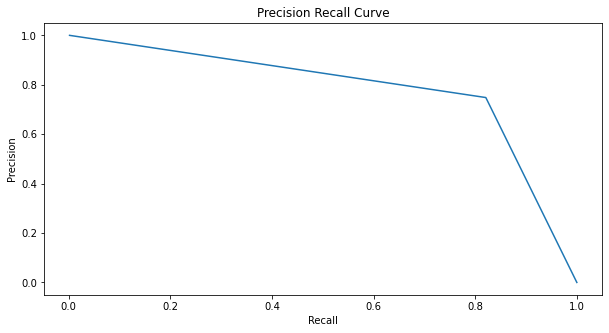

In [56]:
plt.figure(figsize=(10,5))
y_pred_prob = selector.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
print("AUC score is: ", roc_auc_score(y_test, prediction_dtc))

### 5.2 Features change from 15 to 20

In [47]:
model1 = DecisionTreeClassifier()
selector1 = RFE(model1, n_features_to_select = 20)
selector1.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)

In [48]:
selector1.support_

array([ True, False, False,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True])

In [49]:
b = selector1.support_
true_index = [i + 1 if b[i] == True else False for i in range(0, len(b))]
selected_cols = []
cols = data.columns
for i in true_index:
    if i == False:
        pass
    else:
        selected_cols.append(cols[i - 1])
        
print("20 selected features are: ", selected_cols)

20 selected features are:  ['V1', 'V4', 'V7', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V17', 'V18', 'V20', 'V21', 'V22', 'V24', 'V26', 'V27', 'V28', 'Class', 'scaled_amount']


              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85296
       Fraud       0.81      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



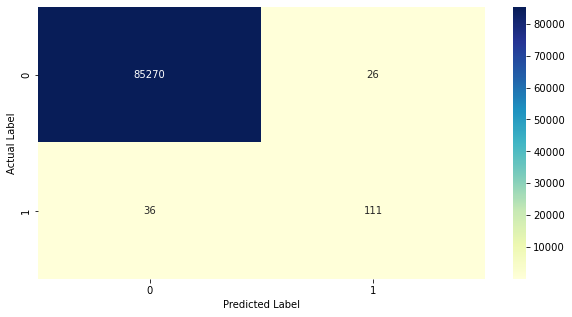

In [50]:
prediction_dtc1 = selector1.predict(X_test)
evaluation(y_test, prediction_dtc1)

<b>There is no much difference we can observe in F1 score and AUC score.</b> This indicates that the increase in number of features from 15 to 20 is not benefitting the model as such.

AUC score is:  0.8773986099786003


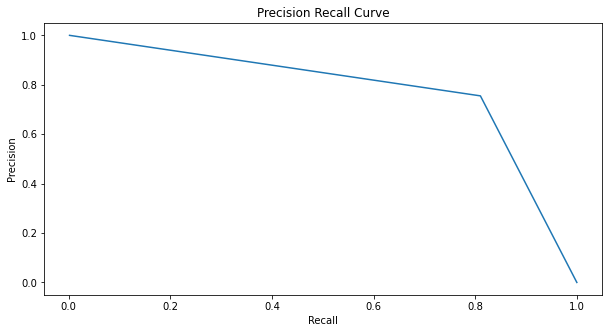

In [51]:
plt.figure(figsize=(10,5))
y_pred_prob = selector1.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
print("AUC score is: ", roc_auc_score(y_test, prediction_dtc1))


## 6. Feature importance

In [52]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'scaled_amount',
       'scaled_time'],
      dtype='object')

Text(0.5, 0, 'Importance')

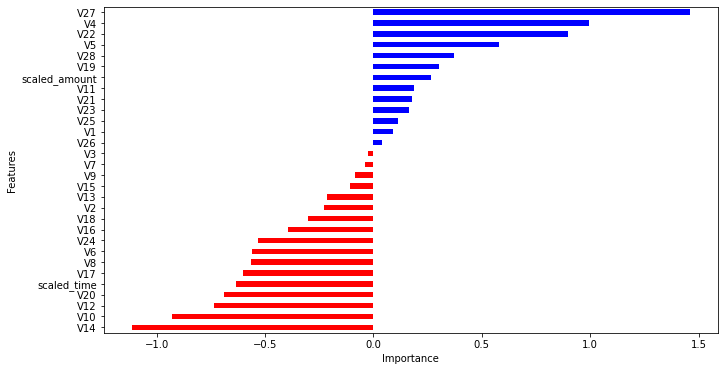

In [53]:
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels # col names
features['importance'] = coeff # beta
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)

features.importance.plot(kind='barh', figsize=(11, 6), color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

<b>V27, V4, V22, V5, V28, V19, V11, V21, V23, V25, V1, V26, scaled_amount</b> are more important features than other features. 

## 7. Conclusion

After investigating and visualizing through the data, we found that the data is unbalanced. So we balanced the data.<br>
After balancing training data, we trainied it and these were the results-

<b>Logistic Regression</b> is giving 99% accuracy, 0.619 recall and 0.8834 precision, 0.8094 ROC-AUC Score<br>
<b>Decision Tree</b> is giving 99% accuracy, 0.7551 recall and 0.7985 precision, 0.8773 ROC-AUC Score

After Balancing the data (Undersampling):

<b>Logistic Regression</b> is giving 93.91% accuracy, 0.9251 recall and 0.9510 precision, 0.9390 ROC-AUC Score<br>
<b>Decision Tree</b> is giving 89.18% accuracy, 0.9455 recall and 0.8527 precision, 0.9090 ROC-AUC Score

RFE with Decision Tree:

<b>RFE with 15 Features and 20 Features</b>
There is no much improvement in Precision & Recall score after selecting 20 features instead of 15 features.
But there is improvement in ROC-AUC score.

### <b>To Conclude:</b>

I think recall score is the most important metric here since the goal is to correctly classify frauds as frauds.
Even if non-frauds are predicted frauds won't harm much as they will be under suspect but if frauds are predicted non-frauds
then that is where the model fails.

<b>So RFE Technique gives better Recall scores than basic model building.</b>

### Thanks for visiting my notebook!!!